In [2]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas #libreria para procesamiento de datos muy usada en la industria
import seaborn # Extiende las funcionalidades de matplotlib, muy usado en data visualization
import os # librería para interactuar con el sistema de archivos 

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

# Archivos
sca_dir = 'DATA-P2/'
archivos_sca = os.listdir(sca_dir)

# Ordeno los archivos para que queden simpre en orden:
archivos_sca.sort()

# Cargamos los datos de los archivos en el array `data`
# se mapea la info de cada caso n a la posicion n-1 en el array
data = []
for caso in range(len(archivos_sca)):
    aux = pandas.read_csv(sca_dir + archivos_sca[caso])
    data.append(aux)

print("archivos cargados: ",', '.join(archivos_sca))

archivos_procesados = []
for archivo in archivos_sca:
    nombre = archivo.replace('.csv', '').replace('-', ' ')
    archivos_procesados.append(nombre)

print("archivos procesados: ",', '.join(archivos_procesados))

/home/matias/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


archivos cargados:  parte2-caso1.csv, parte2-caso2.csv, parte2-caso3.csv
archivos procesados:  parte2 caso1, parte2 caso2, parte2 caso3


## Ocupacion de buffers en el sistema

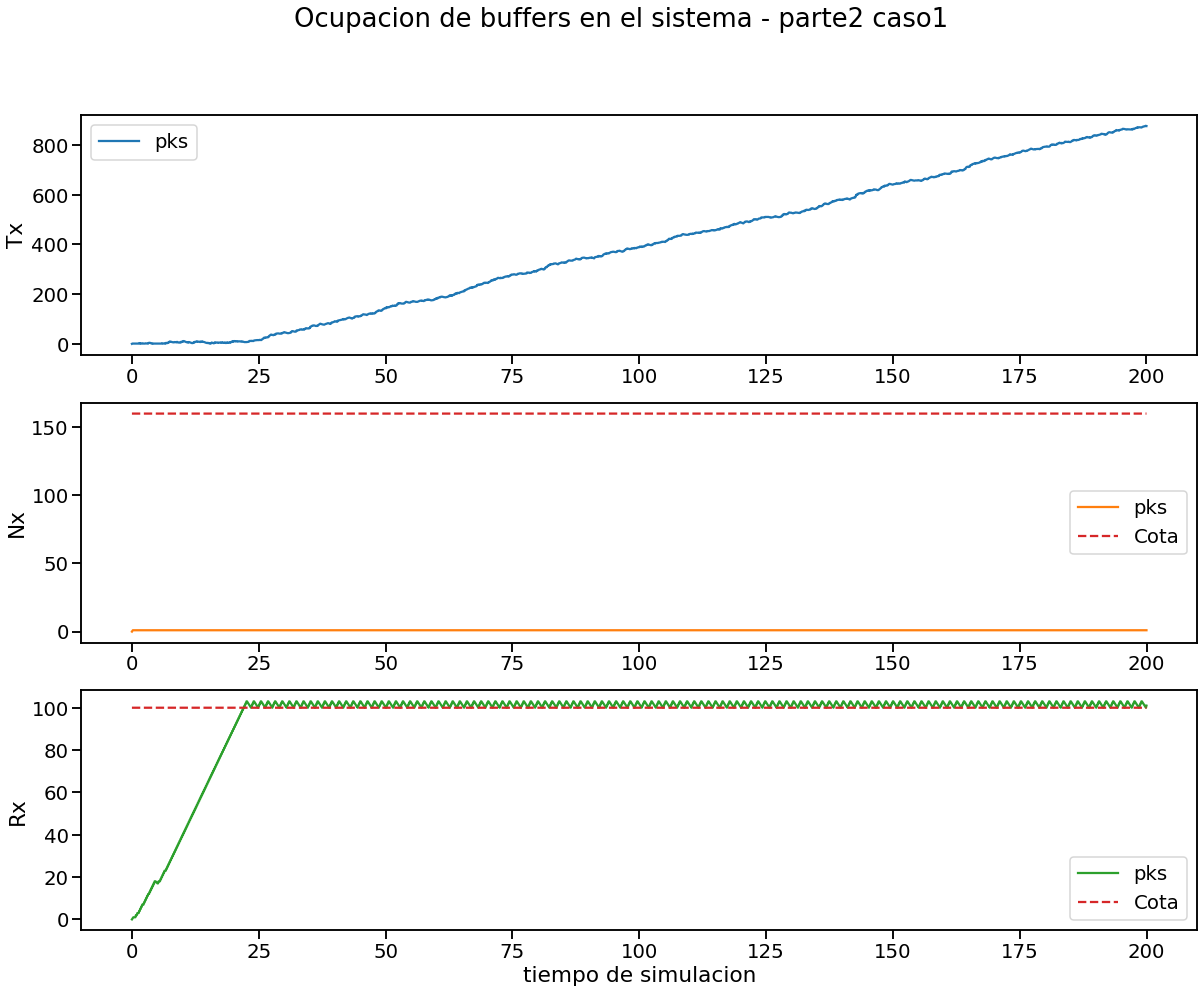

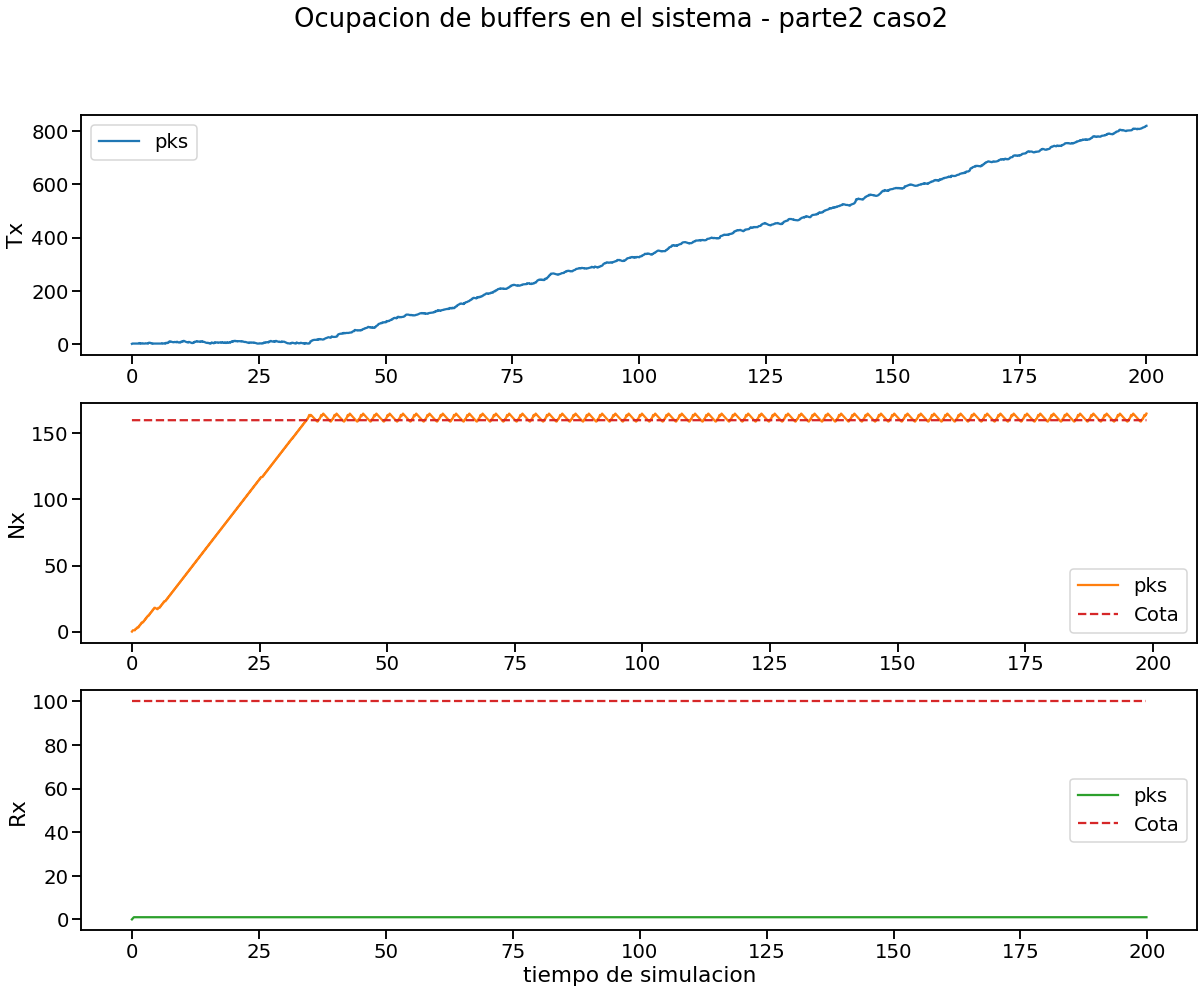

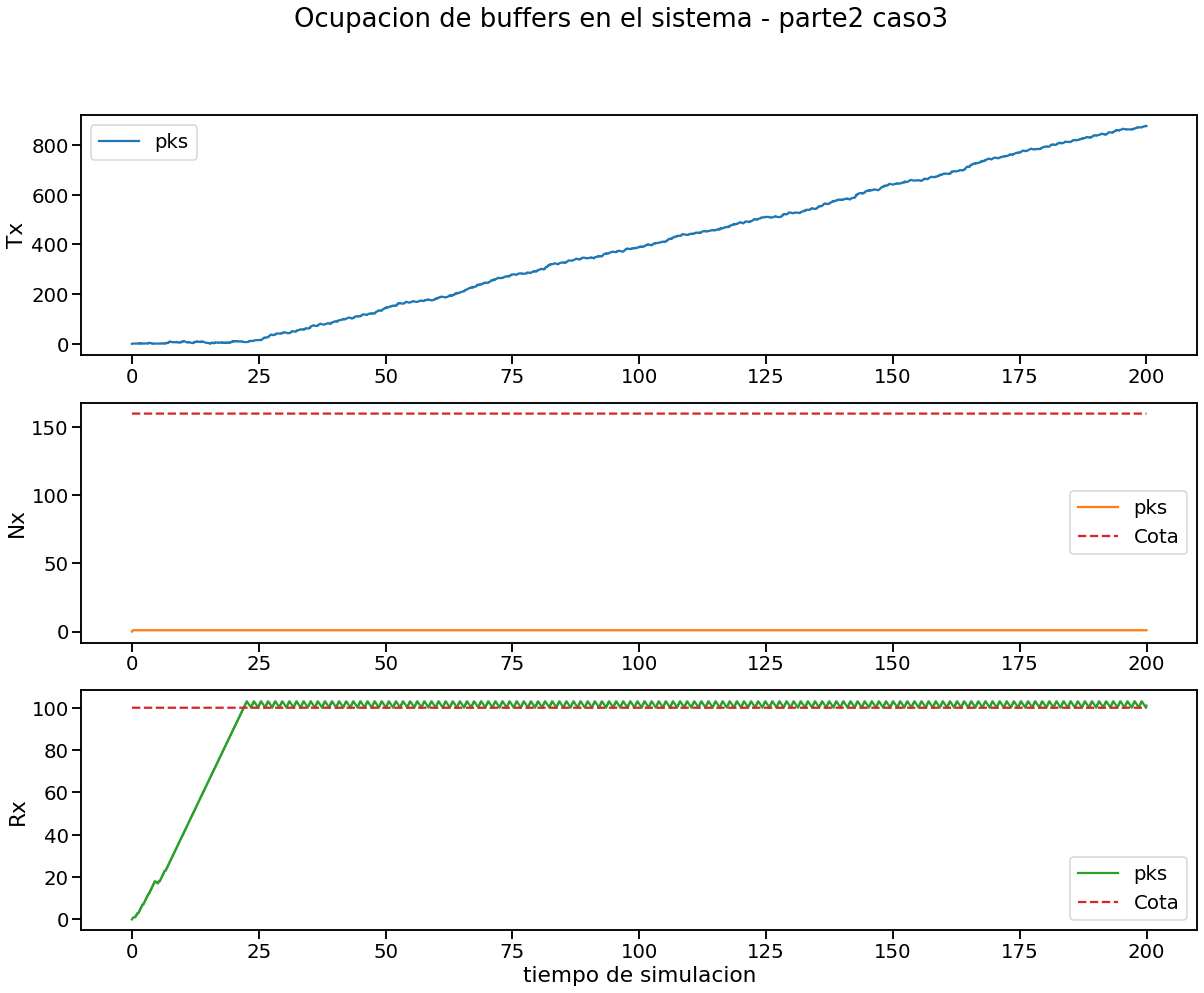

In [3]:
for c in range(len(data)):
    caso = data[c]

    # Extraemos los valores de nuestro "vector"
    time_gen = caso.loc[(caso['module'] == 'Network.nodeTx.traTx') & (caso['name'] == 'BufferSizeVector'), 'vectime'].tolist()
    buffer_gen = caso.loc[(caso['module'] == 'Network.nodeTx.traTx') & (caso['name'] == 'BufferSizeVector'), 'vecvalue'].tolist()

    time_queue = caso.loc[(caso['module'] == 'Network.queue0') & (caso['name'] == 'BufferSizeVector'), 'vectime'].tolist()
    buffer_queue = caso.loc[(caso['module'] == 'Network.queue0') & (caso['name'] == 'BufferSizeVector'), 'vecvalue'].tolist()
    cota_queue = caso.loc[(caso['type'] == 'config') & (caso['attrname'] == 'Network.queue0.bufferCota'), 'attrvalue'].tolist()
    buffSize_queue = caso.loc[(caso['type'] == 'config') & (caso['attrname'] == 'Network.queue0.bufferSize'), 'attrvalue'].tolist()

    time_sink = caso.loc[(caso['module'] == 'Network.nodeRx.traRx') & (caso['name'] == 'BufferSizeVector'), 'vectime'].tolist()
    buffer_sink = caso.loc[(caso['module'] == 'Network.nodeRx.traRx') & (caso['name'] == 'BufferSizeVector'), 'vecvalue'].tolist()
    cota_sink = caso.loc[(caso['type'] == 'config') & (caso['attrname'] == 'Network.nodeRx.traRx.bufferCota'), 'attrvalue'].tolist()
    buffSize_sink = caso.loc[(caso['type'] == 'config') & (caso['attrname'] == 'Network.queue0.bufferSize'), 'attrvalue'].tolist()

    # convertimos los valores (ahora strings separados por comas) a listas para poder graficarlos
    time_gen = list(map(float,time_gen[0].split()))
    time_queue = list(map(float,time_queue[0].split()))
    time_sink = list(map(float,time_sink[0].split()))
    buffer_gen = list(map(float,buffer_gen[0].split()))
    buffer_queue = list(map(float,buffer_queue[0].split()))
    buffer_sink = list(map(float,buffer_sink[0].split()))
    cota_queue = [float(cota_queue[0])*float(buffSize_queue[0])] * (len(time_queue))
    cota_sink = [float(cota_sink[0])*float(buffSize_sink[0])] * (len(time_sink))

    # Graficamos
    fig, ax = plt.subplots(3,figsize=(20, 15))
    fig.suptitle('Ocupacion de buffers en el sistema - {}'.format(archivos_procesados[c]))
    plt.xlabel("tiempo de simulacion")
    #
    ax[0].plot(time_gen,buffer_gen, color='tab:blue', label="pks")
    ax[1].plot(time_queue,buffer_queue, color='tab:orange', label="pks")
    ax[1].plot(time_queue,cota_queue, color='tab:red', label="Cota", linestyle='--')
    ax[2].plot(time_sink,buffer_sink, color='tab:green', label="pks")
    ax[2].plot(time_sink,cota_sink, color='tab:red', label="Cota", linestyle='--')
    #
    ax[0].set_ylabel("Tx")
    ax[1].set_ylabel("Nx")
    ax[2].set_ylabel("Rx")
    #
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    plt.show

## Paquetes generados y paquetes aun dentro del sistema

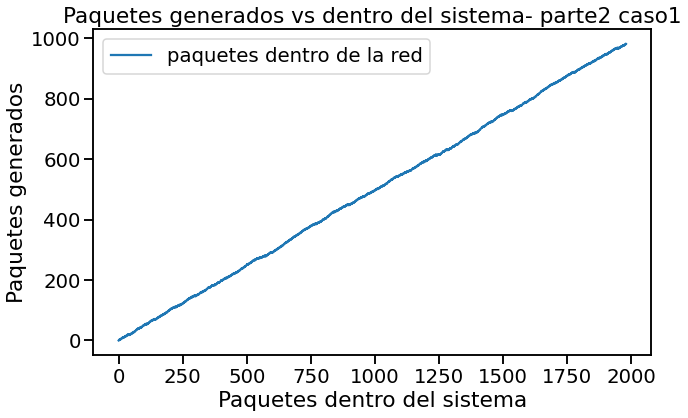

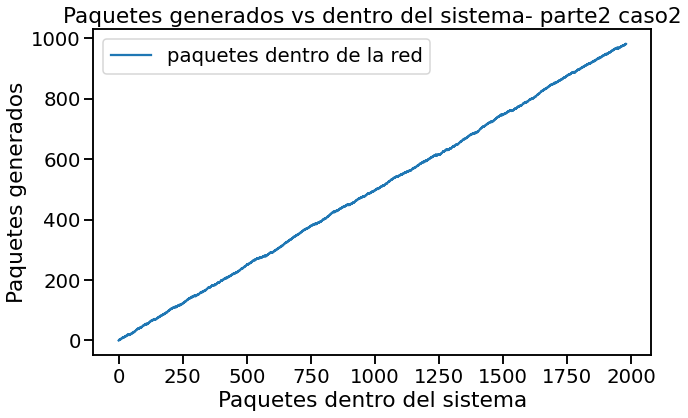

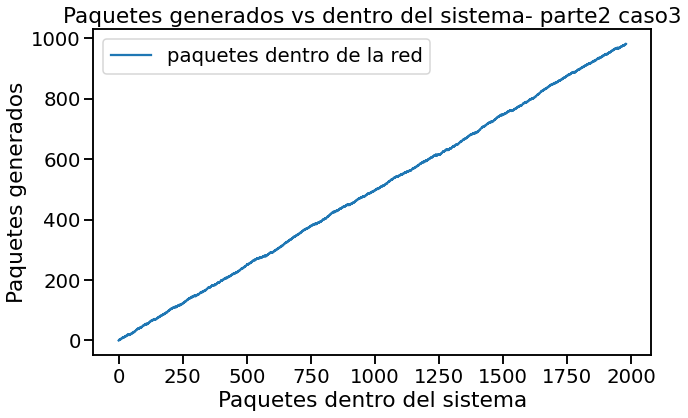

In [8]:
for c in range(len(data)):
    caso = data[c]
    
    # Extraemos la info
    time_gen = caso.loc[(caso['module'] == 'Network.nodeTx.gen') & (caso['name'] == 'packetSent'), 'vectime'].tolist()
    packets_gen = caso.loc[(caso['module'] == 'Network.nodeTx.gen') & (caso['name'] == 'packetSent'), 'vecvalue'].tolist()
    time_dropPks_gen = caso.loc[(caso['module'] == 'Network.nodeTx.gen') & (caso['name'] == 'PacketDropVector'), 'vectime'].tolist()

    time_sink = caso.loc[(caso['module'] == 'Network.nodeRx.sink') & (caso['name'] == 'packetReceived'), 'vectime'].tolist()
    delay_sink = caso.loc[(caso['module'] == 'Network.nodeRx.sink') & (caso['name'] == 'Delay'), 'vecvalue'].tolist()
    packets_sink = caso.loc[(caso['module'] == 'Network.nodeRx.sink') & (caso['name'] == 'packetReceived'), 'vecvalue'].tolist()
    time_dropPks_sink = caso.loc[(caso['module'] == 'Network.nodeRx.sink') & (caso['name'] == 'PacketDropVector'), 'vectime'].tolist()

    time_dropPks_queue = caso.loc[(caso['module'] == 'Network.queue0') & (caso['name'] == 'PacketDropVector'), 'vectime'].tolist()
    
    # Convertimos los valores a flotantes
    time_gen = list(map(float,time_gen[0].split()))
    packets_gen = list(map(float,packets_gen[0].split()))
    time_dropPks_gen = [0.0] if not time_dropPks_gen else list(map(float,time_dropPks_gen[0].split()))
    time_sink = list(map(float,time_sink[0].split()))
    packets_sink = list(map(float,packets_sink[0].split()))
    delay_sink = list(map(float,delay_sink[0].split()))
    time_dropPks_sink = [0.0] if not time_dropPks_sink else list(map(float,time_dropPks_sink[0].split()))
    time_dropPks_queue = [0.0] if not time_dropPks_queue else list(map(float,time_dropPks_queue[0].split()))

    # Creamos lista de tiempo de sucesos `time`
    time = []
    time.extend(time_gen)
    time.extend(time_sink)
    time.extend(time_dropPks_gen)
    time.extend(time_dropPks_sink)
    time.extend(time_dropPks_queue)
    time = list(set(time)) # Eliminamos duplicados
    time.sort() # Ordenamos

    # Creamos lista de paquetes generados `generate_packets` de igual longitud que `time` 
    generate_packets = []
    count_gen = 0
    for i in range(0,len(time)):
        if count_gen < len(time_gen) and time_gen[count_gen] <= time[i] :
            generate_packets.append(packets_gen[count_gen])
            count_gen += 1
        else:
            generate_packets.append(packets_gen[count_gen-1])

    # Creamos lista de tiempos de paquetes salientes del sistema `timeOut_pks`
    timeOut_pks = []
    timeOut_pks.extend(time_sink)
    timeOut_pks.extend(time_dropPks_gen)
    timeOut_pks.extend(time_dropPks_sink)
    timeOut_pks.extend(time_dropPks_queue)
    # No eliminamos duplicados
    timeOut_pks.sort() # Ordenamos
    while 0.0 in timeOut_pks:# Eliminamos todas las apariciones de 0.0 de la lista
        timeOut_pks.remove(0.0)

    # Creamos lista de paquetes en la red `network_packets` 
    network_packets = generate_packets.copy()
    for i in range(0,len(network_packets)): # A cada contador de paquetes generados
        j = 0
        while j < len(timeOut_pks) and time[i] >= timeOut_pks[j]: # Le restamos los paquetes que salen del sistema
            j += 1
            network_packets[i] -= 1
        
    # Graficamos el gráfico de líneas
    plt.figure(figsize=(10, 6))
    plt.plot(generate_packets, network_packets, color='tab:blue', label='paquetes dentro de la red')
    plt.title('Paquetes generados vs dentro del sistema- {}'.format(archivos_procesados[c]))
    plt.xlabel('Paquetes generados')
    plt.ylabel('Paquetes dentro del sistema')
    plt.legend()
    plt.show()

## Paquetes Perdidos y paquetes consumidos

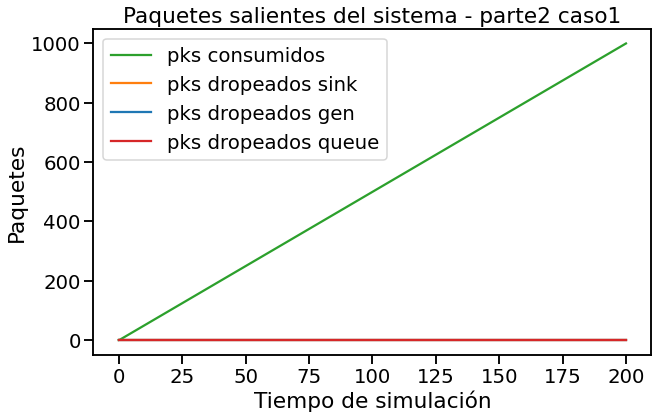

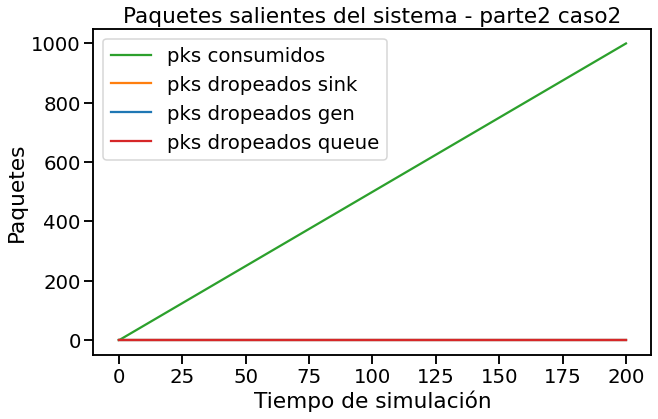

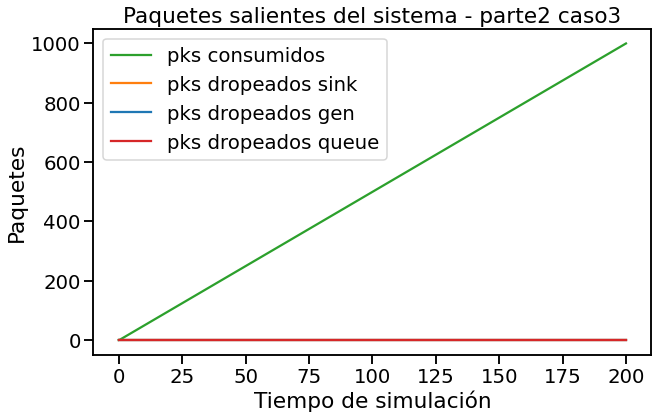

In [10]:
for c in range(len(data)):
    caso = data[c]
    
    # Extraemos la info
    time_dropPks_gen = caso.loc[(caso['module'] == 'Network.nodeTx.gen') & (caso['name'] == 'PacketDropVector'), 'vectime'].tolist()

    time_sink = caso.loc[(caso['module'] == 'Network.nodeRx.sink') & (caso['name'] == 'packetReceived'), 'vectime'].tolist()
    time_dropPks_sink = caso.loc[(caso['module'] == 'Network.nodeRx.sink') & (caso['name'] == 'PacketDropVector'), 'vectime'].tolist()

    time_dropPks_queue = caso.loc[(caso['module'] == 'Network.queue0') & (caso['name'] == 'PacketDropVector'), 'vectime'].tolist()
    
    # Convertimos los valores a flotantes
    time_dropPks_gen = [0.0] if not time_dropPks_gen else list(map(float,time_dropPks_gen[0].split()))
    time_sink = list(map(float,time_sink[0].split()))
    time_dropPks_sink = [0.0] if not time_dropPks_sink else list(map(float,time_dropPks_sink[0].split()))
    time_dropPks_queue = [0.0] if not time_dropPks_queue else list(map(float,time_dropPks_queue[0].split()))

    # Creamos lista de tiempo de tiempo de pks salientes `timeOut_pks`
    timeOut_pks = []
    timeOut_pks.extend(time_sink)
    timeOut_pks.extend(time_dropPks_gen)
    timeOut_pks.extend(time_dropPks_sink)
    timeOut_pks.extend(time_dropPks_queue)
    # Eliminamos duplicados
    timeOut_pks.sort() # Ordenamos

    # Creamos lista de paquetes consumidos `sink_packets` de igual longitud que `timeOut_pks` 
    sink_packets = []
    count_sink = 0
    for i in range(0,len(timeOut_pks)):
        if count_sink < len(time_sink) and time_sink[count_sink] <= timeOut_pks[i] :
            count_sink += 1
            sink_packets.append(count_sink)
        else:
            sink_packets.append(count_sink)
    
    # Creamos lista de paquetes dropeados por gen `drop_gen` de igual longitud que `timeOut_pks` 
    drop_gen = []
    count_drop_gen = 0
    for i in range(0,len(timeOut_pks)):
        if count_drop_gen < len(time_dropPks_gen) and time_dropPks_gen[count_drop_gen] <= timeOut_pks[i] :
            count_drop_gen += 1
            drop_gen.append(count_drop_gen)
        else:
            drop_gen.append(count_drop_gen)

    # Creamos lista de paquetes dropeados por queue `drop_queue` de igual longitud que `timeOut_pks`
    drop_queue = []
    count_drop_queue = 0
    for i in range(0,len(timeOut_pks)):
        if count_drop_queue < len(time_dropPks_queue) and time_dropPks_queue[count_drop_queue] <= timeOut_pks[i] :
            count_drop_queue += 1
            drop_queue.append(count_drop_queue)
        else:
            drop_queue.append(count_drop_queue)

    # Creamos lista de paquetes dropeados por sink `drop_sink` de igual longitud que `timeOut_pks`
    drop_sink = []
    count_drop_sink = 0
    for i in range(0,len(timeOut_pks)):
        if count_drop_sink < len(time_dropPks_sink) and time_dropPks_sink[count_drop_sink] <= timeOut_pks[i] :
            count_drop_sink += 1
            drop_sink.append(count_drop_sink)
        else:
            drop_sink.append(count_drop_sink) 


    # Graficamos el gráfico de líneas
    plt.figure(figsize=(10, 6))
    plt.plot(timeOut_pks, sink_packets, color='tab:green', label='pks consumidos')
    plt.plot(timeOut_pks, drop_sink, color='tab:orange', label='pks dropeados sink')
    plt.plot(timeOut_pks, drop_gen, color='tab:blue', label='pks dropeados gen')
    plt.plot(timeOut_pks, drop_queue, color='tab:red', label='pks dropeados queue')
    plt.title('Paquetes salientes del sistema - {}'.format(archivos_procesados[c]))
    plt.xlabel('Tiempo de simulación')
    plt.ylabel('Paquetes')
    plt.legend()
    plt.show()


## Delay de consumision de los paquetes en el sink

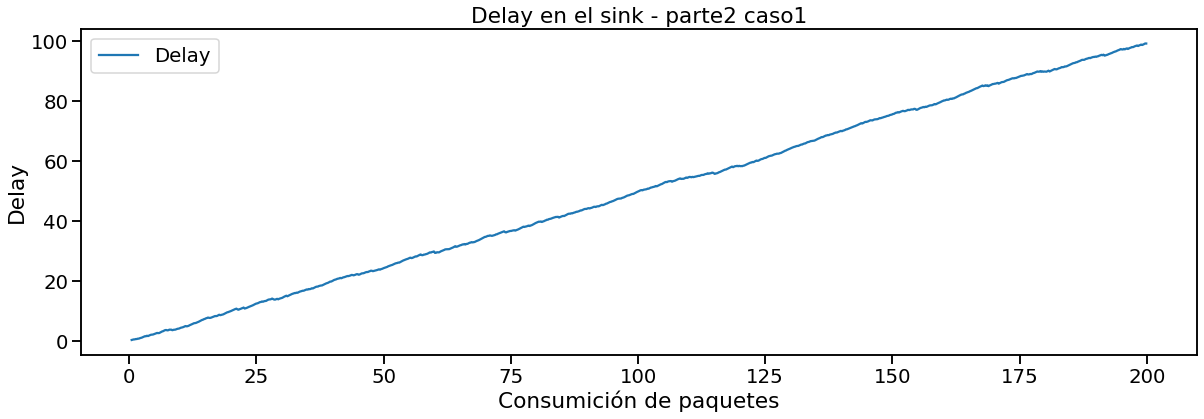

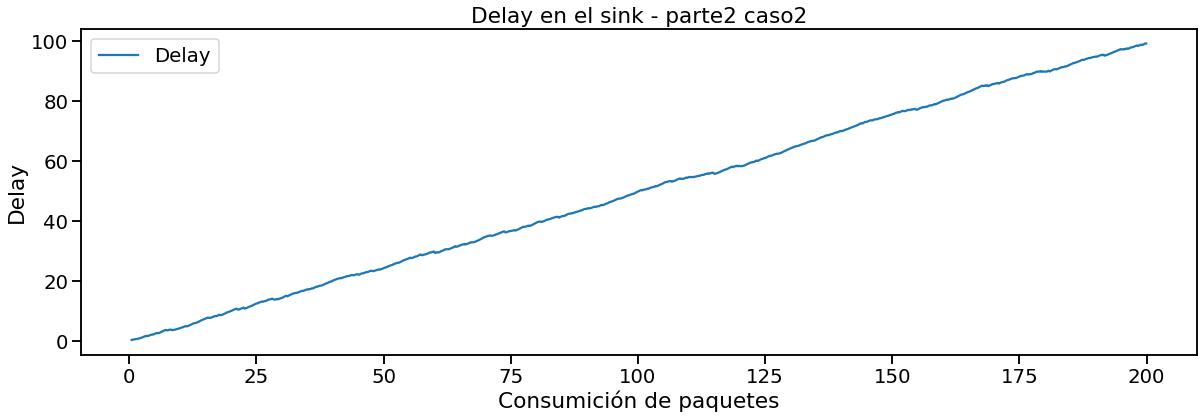

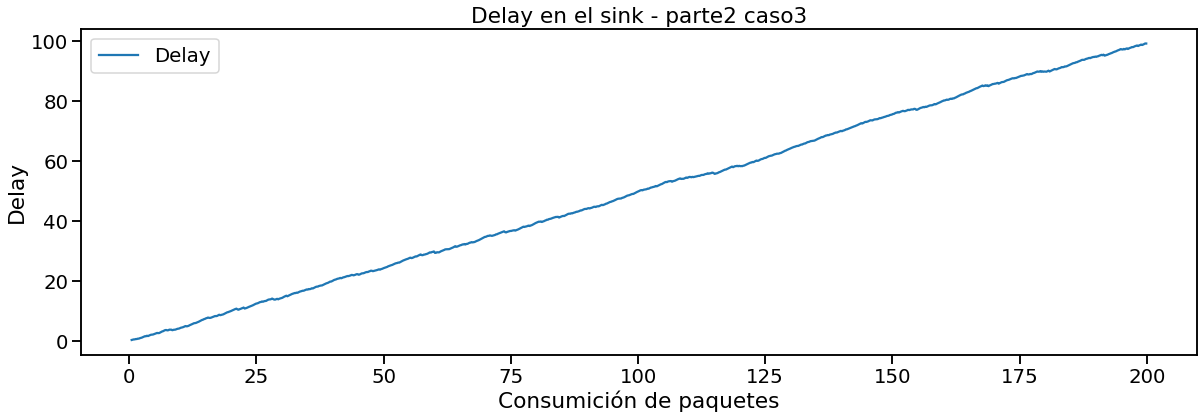

In [6]:
for c in range(len(data)):
    caso = data[c]
    
    # Extraemos la info
    delay_sink = caso.loc[(caso['module'] == 'Network.nodeRx.sink') & (caso['name'] == 'Delay'), 'vecvalue'].tolist()
    time_delay_sink = caso.loc[(caso['module'] == 'Network.nodeRx.sink') & (caso['name'] == 'Delay'), 'vectime'].tolist()

    # Convertimos los valores a flotantes
    delay_sink = list(map(float,delay_sink[0].split()))
    time_delay_sink = list(map(float,time_delay_sink[0].split()))
        
    # Graficamos el grafico de lineas
    plt.figure(figsize=(20, 6))
    plt.plot(time_delay_sink, delay_sink, color='tab:blue', label='Delay')
    plt.title('Delay en el sink - {}'.format(archivos_procesados[c]))
    plt.xlabel('Consumición de paquetes')
    plt.ylabel('Delay')
    plt.legend()
    plt.show()


## Carga util vs carga recibida/ofrecida
Los datos se sacan cada caso

parte2 caso1: Carga Util = 9.895, Carga Ofrecida = 4.99, tiempo limite de simulacion = 200.0
parte2 caso2: Carga Util = 9.895, Carga Ofrecida = 4.99, tiempo limite de simulacion = 200.0
parte2 caso3: Carga Util = 9.895, Carga Ofrecida = 4.99, tiempo limite de simulacion = 200.0


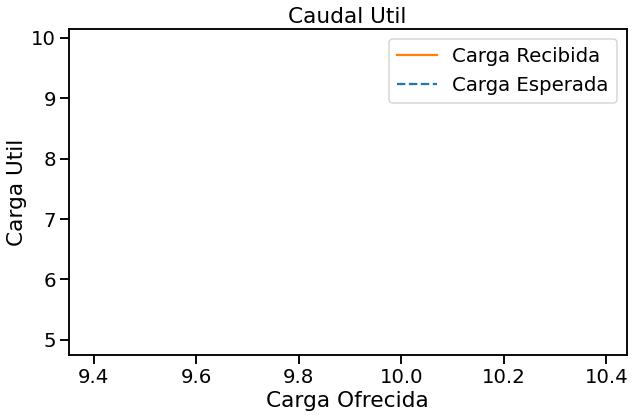

In [7]:

# OPTIONAL: NO UTILIZADA
# # Calculamos la posicion del ultimo numero de paquetes generados que pudieron ser consumidos en el sink
# lastSink_time = time_sink[len(time_sink)-1] 
# lastSink_packetGenTime = lastSink_time - delay_sink[len(delay_sink)-1]
# pos = 0
# while time_gen[pos] != lastSink_packetGenTime :
#     pos += 1
# # packets_gen[pos] := numero de paquetes generados que pudieron ser consumidos en el sink (o perdidos)
# OPTIONAL: NO UTILIZADA, le faltaria contar los paquetes que se perdieron...

# Carga Util = Paquetes generados por segundo
# Carga Util de los casos 1,...,n = cUtil
# Carga Ofrecida = Paquetes recibidos por segundo
# Carga ofrecida de los casos 1,...,n = cOfrecida
cUtil = []     # X
cOfrecida = [] # Y
for i in range(0, len(data)):

    # Extraemos la info
    packets_gen = caso.loc[(caso['module'] == 'Network.nodeTx.gen') & (caso['name'] == 'packetSent'), 'vecvalue'].tolist()
    packets_sink = caso.loc[(caso['module'] == 'Network.nodeRx.sink') & (caso['name'] == 'packetReceived'), 'vecvalue'].tolist()
    sim_time_limit = caso.loc[(caso['type'] == 'config') & (caso['attrname'] == 'sim-time-limit'), 'attrvalue'].tolist()
    
    # Eliminar el carácter 's' de la cadena
    sim_time_limit = sim_time_limit[0].replace('s', '')

    # Convertimos los valores a flotantes
    packets_gen = list(map(float,packets_gen[0].split()))
    packets_sink = list(map(float,packets_sink[0].split()))
    sim_time_limit = float(sim_time_limit)

    # Calculamos
    pks_gen_por_seg = packets_gen[len(packets_gen)-1] / sim_time_limit
    cUtil.append(pks_gen_por_seg)
    pks_sink_por_seg = packets_sink[len(packets_sink)-1] / sim_time_limit
    cOfrecida.append(pks_sink_por_seg)

    print("{}: Carga Util = {}, Carga Ofrecida = {}, tiempo limite de simulacion = {}".format(archivos_procesados[i], cUtil[i], cOfrecida[i], sim_time_limit))

# Graficamos el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(cUtil, cOfrecida, color='tab:orange', label='Carga Recibida')
plt.plot(cUtil, cUtil, color='tab:blue', label='Carga Esperada', linestyle='--')
plt.title('Caudal Util')
plt.xlabel('Carga Ofrecida')
plt.ylabel('Carga Util')
plt.legend()
plt.show()

